In [1]:
from moexalgo import session
import os
from dotenv import load_dotenv

# Загрузить переменные окружения из файла .env
load_dotenv()

username = os.environ["MOEX_USER"]
password = os.environ["MOEX_PASS"]

session.authorize(username, password)

True

In [2]:
from moexalgo import session, Market, Ticker, CandlePeriod

stocks = Market("stocks")
all_stocks = stocks.tickers()  # Вызоваем метод tickers() на экземпляре класса Market
print(all_stocks)

stocks = Market("stocks")
all_stocks = stocks.tickers()  # Вызоваем метод tickers() на экземпляре класса Market
print(all_stocks)

sber = Ticker('SBER')

    ticker   shortname  lotsize  decimals  minstep   issuesize          isin  \
0     ABIO  iАРТГЕН ао       10         2    0.020    92645451  RU000A0JNAB6   
1     ABRD  АбрауДюрсо       10         1    0.200    98000184  RU000A0JS5T7   
2     ACKO     АСКО ао      100         2    0.020   536000000  RU000A0JXS91   
3     AFKS  Система ао      100         3    0.001  9650000000  RU000A0DQZE3   
4     AFLT    Аэрофлот       10         2    0.010  3975771215  RU0009062285   
..     ...         ...      ...       ...      ...         ...           ...   
255   YRSB     ТНСэнЯр       10         0    2.000    17143584  RU000A0D8760   
256  YRSBP   ТНСэнЯр-п       10         1    0.500     4507320  RU000A0D88B3   
257   ZAYM   Займер ао       10         2    0.050   100000000  RU000A107RM8   
258   ZILL      ЗИЛ ао        1         0    5.000     2659962  RU0009086193   
259   ZVEZ   ЗВЕЗДА ао     1000         2    0.010   562020480  RU0009091300   

        regnumber  listlevel  
0    1-0

In [3]:
trades = sber.trades()
print(sber)
print(trades)

Stock('SBER/TQBR')
          tradeno tradetime boardid secid   price  quantity     value period  \
0     12067729071  09:59:34    TQBR  SBER  282.20        17   47974.0      S   
1     12067729072  09:59:34    TQBR  SBER  282.20        35   98770.0      S   
2     12067729073  09:59:34    TQBR  SBER  282.20         1    2822.0      S   
3     12067729074  09:59:34    TQBR  SBER  282.20         1    2822.0      S   
4     12067729075  09:59:34    TQBR  SBER  282.20         7   19754.0      S   
...           ...       ...     ...   ...     ...       ...       ...    ...   
3924  12067825071  10:04:46    TQBR  SBER  281.84        56  157830.4      N   
3925  12067825319  10:04:47    TQBR  SBER  281.90        40  112760.0      N   
3926  12067825416  10:04:48    TQBR  SBER  281.90         1    2819.0      N   
3927  12067825612  10:04:49    TQBR  SBER  281.84         2    5636.8      N   
3928  12067825750  10:04:50    TQBR  SBER  281.88         1    2818.8      N   

      tradetime_grp 

C:\Users\sasakinme\AppData\Local\Temp\ipykernel_2168\313147916.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_volume = trades.groupby('price_bin')['quantity'].sum().reset_index()


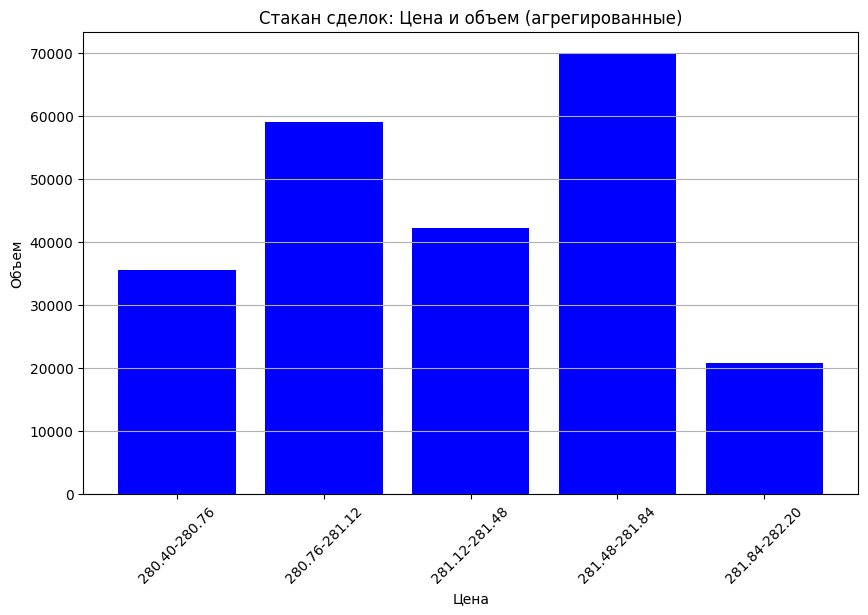

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Определение количества бинов
num_bins = 5  # Вы можете настроить это значение

# Создание бинов на основе цен
bins = np.linspace(trades['price'].min(), trades['price'].max(), num_bins + 1)

# Создание меток для бинов
labels = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins) - 1)]

# Добавление новой колонки с бинами
trades['price_bin'] = pd.cut(trades['price'], bins=bins, labels=labels, right=False)

# Группировка данных по бинам и суммирование объемов
price_volume = trades.groupby('price_bin')['quantity'].sum().reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(price_volume['price_bin'], price_volume['quantity'], color='blue')
plt.title('Стакан сделок: Цена и объем (агрегированные)')
plt.xlabel('Цена')
plt.ylabel('Объем')
plt.xticks(rotation=45)  # Повернуть метки на оси X для лучшей читаемости
plt.grid(axis='y')

# Показать график
plt.show()

In [5]:
# выбираем акции Сбера
sber = Ticker('SBER')

# получим дневные свечи с 2020 года
sber.candles(start='2024-12-31', end='2024-12-31').head()

""


In [ ]:
import moexalgo

# Указываем тикер инструмента (например, SBER для акций Сбербанка)
ticker = 'SBER'

# Получаем стакан заявок
orderbook = sber.orderbook(cs=session, use_dataframe=True)

# Выводим стакан заявок
print("Стакан заявок для инструмента", ticker)
print(orderbook)

AssertionError: 